In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nfl_data_py as nfl # package that works with NFL data sourced from nflfastR, nfldata, dynastyprocess, and Draft Scout.

from bs4 import BeautifulSoup
from urllib import request

#### Code below is in case I need to do web-scraping to find extra data

website = request.urlopen("https://www.pro-football-reference.com/years/2021/fantasy.htm").read()
soup = BeautifulSoup(website, 'lxml')

table = soup.find('table', attrs={'id': 'fantasy','class': 'per_match_toggle'})

table_headers = [header.text for header in table.find('thead').find_all('th')]
table_rows = table.find_all('tr')

player_data = [[td.getText() for tr in table_rows[i].findAll(['td','th'])] for i in table_rows]

print(table_headers)
df = pd.DataFrame(player_data,table_headers)

df.head()
df = pd.DataFrame(df, columns = table_headers)

In [227]:
# fantasy football datasets; results from each season

ff21 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2021.csv', index_col = 0)

ff20 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')

ff19 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv', index_col = 0)

# all nfl team names and abbreviations

nflteams = pd.read_csv('https://gist.githubusercontent.com/cnizzardini/13d0a072adb35a0d5817/raw/f315c97c7677845668a9c26e9093d0d550533b00/nfl_teams.csv',
                       index_col=0)
# team stats and rankings from each game per season

team19 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2019_NFL_COMBINE.csv", index_col = 0)
team20 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2020_NFL_COMBINE.csv", index_col = 0)
team21 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2021_NFL_COMBINE.csv", index_col = 0)

# Incoming rookie data

rosters19 = nfl.import_rosters([2019], ['team', 'player_name','position', 'player_id', 'height', 'weight', 'years_exp'])

rosters20 = nfl.import_rosters([2020], ['team', 'player_name', 'position', 'player_id', 'height', 'weight', 'years_exp'])

rosters21 = nfl.import_rosters([2021], ['team', 'player_name', 'position', 'player_id', 'height', 'weight', 'years_exp', 'rookie_year'])


# seasonal data

season19 = nfl.import_seasonal_data([2019])
season20 = nfl.import_seasonal_data([2020])
season21 = nfl.import_seasonal_data([2021])

# PFF Data (OL rankings, etc)


# Injury Data?
injuries19 = nfl.import_injuries([2019])
injuries20 = nfl.import_injuries([2020])
injuries21 = nfl.import_injuries([2021])

# QBR data
# defaults are NFL and seasonal

qbr19 = nfl.import_qbr([2019])
qbr20 = nfl.import_qbr([2020])
qbr21 = nfl.import_qbr([2021])

# Next gen stat data

ngs_rushing = nfl.import_ngs_data('rushing', [2019, 2020, 2021])

ngs_receiving = nfl.import_ngs_data('receiving', [2019, 2020, 2021])

ngs_passing = nfl.import_ngs_data('passing', [2019, 2020, 2021])

# team wins

team_wins = nfl.import_win_totals([2019, 2020, 2021])

# contract data?


# clean data of team name, player name, and other descriptive data
# clean = nfl.clean_nfl_data(insert_Df)


C:\Users\steph\miniconda3\lib\site-packages\nfl_data_py\__init__.py:290: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  season_stats = all_stats.drop(['recent_team', 'week'], axis=1).groupby(
C:\Users\steph\miniconda3\lib\site-packages\nfl_data_py\__init__.py:309: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  szn = data.groupby(['player_id', 'season', 'season_type']).sum().reset_index().merge(
C:\Users\steph\miniconda3\lib\site-packages\nfl_data_py\__init__.py:290: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

In [182]:
# next gen stats peek

ngs_rushing.head()

,season,season_type,week,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,...,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
1768,2019,REG,0,Leonard Fournette,RB,JAX,3.841727,31.698113,2.807543,265,...,120.413002,4.347170,0.461352,0.318008,3,00-0033856,Leonard,Fournette,27,L.Fournette
1769,2019,REG,0,Austin Ekeler,RB,LAC,4.403142,10.606061,3.088856,132,...,-86.520370,4.219697,-0.670701,0.317829,3,00-0033699,Austin,Ekeler,30,A.Ekeler
1770,2019,REG,0,Kenyan Drake,RB,ARI,3.663611,8.823529,2.894500,170,...,36.622486,4.805882,0.217991,0.363095,8,00-0033118,Kenyan,Drake,41,K.Drake
1771,2019,REG,0,Alexander Mattison,RB,MIN,4.028377,34.000000,2.734030,100,...,64.705723,4.620000,0.667069,0.391753,1,00-0034972,Alexander,Mattison,25,A.Mattison
1772,2019,REG,0,Benny Snell,RB,PIT,4.054296,39.814815,2.804593,108,...,54.103981,3.944444,0.505645,0.495327,2,00-0035217,Benny,Snell,24,B.Snell Jr.


In [183]:
# QBR peek

qbr19.sample(10)

,season,season_type,game_week,team_abb,player_id,name_short,rank,qbr_total,pts_added,qb_plays,...,exp_sack,penalty,qbr_raw,sack,name_first,name_last,name_display,headshot_href,team,qualified
1005,2019,Playoffs,Season Total,NE,2330,T. Brady,10.0,40.8,-0.6,38,...,0,0.2,44.2,0.0,Tom,Brady,Tom Brady,https://a.espncdn.com/i/headshots/nfl/players/...,Patriots,True
994,2019,Regular,Season Total,NO,16728,T. Bridgewater,NaN,50.9,-2.0,239,...,0,-0.6,47.1,-5.7,Teddy,Bridgewater,Teddy Bridgewater,https://a.espncdn.com/i/headshots/nfl/players/...,Saints,False
986,2019,Regular,Season Total,ATL,5615,M. Schaub,NaN,80.2,8.3,76,...,0,0.5,82.4,-0.6,Matt,Schaub,Matt Schaub,https://a.espncdn.com/i/headshots/nfl/players/...,Falcons,False
960,2019,Regular,Season Total,BUF,3918298,J. Allen,24.0,49.4,-3.8,639,...,0,2.6,47.9,-17.4,Josh,Allen,Josh Allen,https://a.espncdn.com/i/headshots/nfl/players/...,Bills,True
996,2019,Playoffs,Season Total,SEA,14881,R. Wilson,1.0,89.8,11.1,87,...,0,-0.3,85.9,-2.2,Russell,Wilson,Russell Wilson,https://a.espncdn.com/i/headshots/nfl/players/...,Seahawks,True
972,2019,Regular,Season Total,DET,16813,L. Thomas,NaN,100.0,0.7,1,...,0,0.8,100.0,0.0,Logan,Thomas,Logan Thomas,https://a.espncdn.com/i/headshots/nfl/players/...,Lions,False
1014,2019,Playoffs,Season Total,PHI,2573079,C. Wentz,NaN,5.1,-1.2,6,...,0,0.3,5.9,-0.2,Carson,Wentz,Carson Wentz,https://a.espncdn.com/i/headshots/nfl/players/...,Eagles,False
966,2019,Regular,Season Total,PIT,3116407,M. Rudolph,30.0,36.2,-12.9,336,...,0,3.2,36.8,-7.8,Mason,Rudolph,Mason Rudolph,https://a.espncdn.com/i/headshots/nfl/players/...,Steelers,True
941,2019,Regular,Season Total,SEA,14881,R. Wilson,5.0,71.5,43.0,674,...,0,1.5,71.2,-20.6,Russell,Wilson,Russell Wilson,https://a.espncdn.com/i/headshots/nfl/players/...,Seahawks,True
991,2019,Regular,Season Total,SF,3127306,D. Pettis,NaN,57.3,0.0,1,...,0,0.0,61.7,0.0,Dante,Pettis,Dante Pettis,https://a.espncdn.com/i/headshots/nfl/players/...,49ers,False


## Data Cleaning

Need to clean player name from *, + and/or both.

Merge in QBR data to QB data; ngs_rushing to qb and rb

need a dataset of predictor variables for final -- previous year's players (2021) plus rookies (2022) draft.

Need to bring in a dataset of rookies 

Need a dataset of team ranks from previous year (2021)

Need to group by position, as points scored and value is dependent on position.


We'll use 19 and 20 as training years; 21 as test year. 

Final model will use previous 2 season data, and other, to predict upcoming season data


### Fantasy Points DataSources

In [184]:
ff20.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1


In [185]:
ff21.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp*+,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel*+,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0


In [186]:
ff19.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,142.0,116.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20,0.0,1.0,0.0
1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0
2,Derrick Henry,TEN,RB,25.0,15.0,15.0,24.0,18.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60,0.0,5.0,3.0
3,Aaron Jones,GNB,RB,25.0,16.0,16.0,68.0,49.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80,0.0,3.0,2.0
4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,71.0,54.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70,0.0,3.0,2.0


## Create Team Stats DFs for each season

In [187]:
team19.head()

,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,1,Sun,8-Sep,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,...,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers
1,2,Sun,15-Sep,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,...,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers
2,3,Sun,22-Sep,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,...,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers
3,4,NaN,NaN,NaN,Bye Week,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco 49ers
4,5,Mon,7-Oct,W,Cleveland Browns,31.0,3.0,22.0,446.0,171.0,...,NaN,9.0,180.0,78.0,102.0,4.0,12.38,22.56,-10.50,San Francisco 49ers


In [188]:
# ensure all teams are represented

team21['Home_team'].value_counts()

Los Angeles Rams        23
Cincinnati Bengals      23
San Francisco 49ers     22
Kansas City Chiefs      22
Tampa Bay Buccaneers    21
Buffalo Bills           21
Arizona Cardinals       20
Pittsburgh Steelers     20
Green Bay Packers       20
Dallas Cowboys          20
Philadelphia Eagles     20
Tennessee Titans        20
Oakland Raiders         20
New England Patriots    20
Houston Texans          18
Seattle Seahawks        18
New Orleans Saints      18
Baltimore Ravens        18
Carolina Panthers       18
New York Giants         18
Detroit Lions           18
New York Jets           18
Jacksonville Jaguars    18
Chicago Bears           18
Atlanta Falcons         18
Miami Dolphins          18
Indianapolis Colts      18
Los Angeles Chargers    18
Cleveland Browns        18
Denver Broncos          18
Minnesota Vikings       18
Name: Home_team, dtype: int64

The Washington Football Team (Commanders) are not represented in any of these team datasets.

In [189]:
# getting rid of bye week rows

team19 = team19[team19.Opp != 'Bye Week']

team19.head()

,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,1,Sun,8-Sep,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,...,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers
1,2,Sun,15-Sep,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,...,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers
2,3,Sun,22-Sep,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,...,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers
4,5,Mon,7-Oct,W,Cleveland Browns,31.0,3.0,22.0,446.0,171.0,...,NaN,9.0,180.0,78.0,102.0,4.0,12.38,22.56,-10.50,San Francisco 49ers
5,6,Sun,13-Oct,W,Los Angeles Rams,20.0,7.0,22.0,331.0,232.0,...,2.0,10.0,157.0,48.0,109.0,1.0,-3.54,25.23,-5.01,San Francisco 49ers


Important to note, 2021 is first year with 18 weeks, rather than 17.

In [190]:
# must get rid of division, wild card, conf champ, and superbowl

reg1920 = np.arange(1, 18).astype(str)
reg21 = np.arange(1,19).astype(str)



team19_reg = team19.loc[team19['Week'].isin(reg1920)]
team20_reg = team20.loc[team20['Week'].isin(reg1920)]
team21_reg = team21.loc[team21['Week'].isin(reg21)]

team19_reg['Week'].value_counts()

1     31
2     31
3     31
17    31
16    31
15    31
14    31
13    31
4     29
8     29
5     29
11    27
12    27
9     27
7     27
6     27
10    26
Name: Week, dtype: int64

In [191]:
# dropping irrelevant columns

team19_reg = team19_reg.drop(['Week','Day', 'Date', 'Opp'], axis = 1)
team20_reg = team20_reg.drop(['Week','Day', 'Date', 'Opp'], axis = 1)
team21_reg = team21_reg.drop(['Week','Day', 'Date', 'Opp'], axis = 1)


In [192]:
# trying to get team data

team19_agg = team19_reg.groupby('Home_team', as_index = False).mean()
team20_agg = team20_reg.groupby('Home_team', as_index = False).mean()
team21_agg = team21_reg.groupby('Home_team', as_index = False).mean()

C:\Users\steph\AppData\Local\Temp/ipykernel_17444/3625399271.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team19_agg = team19_reg.groupby('Home_team', as_index = False).mean()
C:\Users\steph\AppData\Local\Temp/ipykernel_17444/3625399271.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team20_agg = team20_reg.groupby('Home_team', as_index = False).mean()
C:\Users\steph\AppData\Local\Temp/ipykernel_17444/3625399271.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or sele

In [193]:
team19_agg.sample(5)

,Home_team,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
23,New York Jets,17.2500,22.4375,15.8125,273.0000,194.4375,78.5625,1.785714,18.8750,323.1250,236.1875,86.9375,1.750000,-7.057500,0.433750,1.716875
26,Pittsburgh Steelers,18.0625,18.9375,16.5625,276.7500,186.3125,90.4375,1.875000,19.0000,304.1250,194.5625,109.5625,2.714286,-5.347500,5.423750,-0.695000
18,Miami Dolphins,19.1250,30.8750,19.6875,310.0000,237.7500,72.2500,1.857143,22.5625,397.7500,262.3750,135.3750,1.454545,-1.803125,-10.626250,0.781250
2,Baltimore Ravens,33.1875,17.6250,24.1250,407.5625,201.5625,206.0000,1.666667,17.2500,300.5625,207.1875,93.3750,1.785714,15.256250,2.003750,-0.963750
27,San Francisco 49ers,29.9375,19.3750,21.0000,381.0625,237.0000,144.0625,1.916667,17.8125,281.8125,169.1875,112.6250,1.928571,7.281875,5.719375,-2.425625


In [194]:
ff21.dtypes


Player            object
Tm                object
Pos               object
Age                int64
G                  int64
GS                 int64
Tgt              float64
Rec              float64
PassingYds       float64
PassingTD        float64
PassingAtt       float64
RushingYds       float64
RushingTD        float64
RushingAtt       float64
ReceivingYds     float64
ReceivingTD      float64
FantasyPoints    float64
Int              float64
Fumbles          float64
FumblesLost      float64
dtype: object

In [195]:
# cleaning player names

ff21['Player'] = ff21['Player'].str.replace("+","", regex = True)
ff21['Player'] = ff21['Player'].str.replace("*","", regex = True)

ff20['Player'] = ff20['Player'].str.replace("+","", regex = True)
ff20['Player'] = ff20['Player'].str.replace("*","", regex = True)

ff19['Player'] = ff19['Player'].str.replace("+","", regex = True)
ff19['Player'] = ff19['Player'].str.replace("*","", regex = True)



## Roster data

Now that fantasy points for 3 seasons are relatively cleaned; before merging, let's try to clean up roster data

In [196]:
rosters19.sample(n=8)

,team,player_name,position,player_id,height,weight,years_exp
2704,PHI,Rodney McLeod,DB,00-0028899,70,195.0,7.0
3170,TB,Vita Vea,DL,00-0034773,76,347.0,1.0
3202,TB,Brad Seaton,OL,00-0033795,81,330.0,NaN
1402,IND,Ben Banogu,DL,00-0034969,75,252.0,0.0
1174,DET,Jonathan Duhart,WR,00-0035325,75,210.0,NaN
2955,SEA,Bryan Mone,DL,00-0035094,75,366.0,0.0
1000,DEN,Don Barclay,OL,00-0029187,None,305.0,NaN
3294,TEN,Josh Smith,LB,00-0035741,76,240.0,NaN


In [197]:
# We must get rid of non-offensive, fantasy irrelevant positions

# for this analysis, only focused on qb, rb, wr, te

ff_positions = ['QB', 'RB', 'WR', 'TE']

rosters19_rel = rosters19.loc[rosters19['position'].isin(ff_positions)]
rosters20_rel = rosters20.loc[rosters20['position'].isin(ff_positions)]
rosters21_rel = rosters21.loc[rosters21['position'].isin(ff_positions)]

In [198]:
ff19.shape

(620, 20)

In [199]:
ff19_r = pd.merge(rosters19_rel, ff19, how = 'inner', left_on = rosters19_rel['player_name'], right_on = ff19['Player'], suffixes = ('_19r', '_19')).reset_index(drop = True)

ff19_r.head()

,key_0,team,player_name,position,player_id,height,weight,years_exp,Player,Tm,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Brett Hundley,ARI,Brett Hundley,QB,00-0031589,75,226.0,4.0,Brett Hundley,ARI,...,11.0,41.0,0.0,7.0,0.0,0.0,6.06,0.0,0.0,0.0
1,Kyler Murray,ARI,Kyler Murray,QB,00-0035228,70,207.0,0.0,Kyler Murray,ARI,...,542.0,544.0,4.0,93.0,0.0,0.0,279.28,12.0,5.0,2.0
2,Alfred Morris,ARI,Alfred Morris,RB,00-0029141,70,222.0,NaN,Alfred Morris,ARI,...,0.0,4.0,0.0,1.0,0.0,0.0,0.40,0.0,0.0,0.0
3,David Johnson,ARI,David Johnson,RB,00-0032187,73,224.0,4.0,David Johnson,ARI,...,0.0,345.0,2.0,94.0,370.0,4.0,141.50,0.0,1.0,1.0
4,Kenyan Drake,ARI,Kenyan Drake,RB,00-0033118,73,211.0,3.0,Kenyan Drake,2TM,...,0.0,817.0,8.0,170.0,345.0,0.0,212.20,0.0,2.0,1.0


In [200]:
# there may be duplicates in this

rosters20_rel.loc[rosters20_rel['player_name'].duplicated() == True]

,team,player_name,position,player_id,height,weight,years_exp
2674,SF,Chris Thompson,WR,00-0033855,72,175,3.0
2738,TB,Ryan Griffin,QB,00-0029857,77,210,7.0


In [201]:
# dropping duplicates here

rosters20_rel = rosters20_rel.drop_duplicates(subset = ['player_name'], keep = 'first')
ff20 = ff20.drop_duplicates(subset = ['Player'], keep = 'first')

In [202]:
ff20_r = pd.merge(rosters20_rel, ff20, how = 'inner', left_on = rosters20_rel['player_name'], right_on = ff20['Player'], suffixes = ('_20r', '_20')).reset_index(drop = True)

ff20_r.sample(5)

,key_0,team,player_name,position,player_id,height,weight,years_exp,Player,Tm,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
168,Nick Vannett,DEN,Nick Vannett,TE,00-0032394,78,261,4.0,Nick Vannett,DEN,...,0,0,0,0,95,1,16.0,0,0,0
363,Alexander Mattison,MIN,Alexander Mattison,RB,00-0034972,71,220,1.0,Alexander Mattison,MIN,...,0,434,2,96,125,1,74.0,0,0,0
101,Cole Kmet,CHI,Cole Kmet,TE,00-0036290,78,258,0.0,Cole Kmet,CHI,...,0,-3,0,1,243,2,34.0,0,1,1
141,Marvin Hall,CLE,Marvin Hall,WR,00-0033094,70,190,4.0,Marvin Hall,2TM,...,0,1,0,1,302,2,42.0,0,0,0
202,Aaron Jones,GB,Aaron Jones,RB,00-0033293,69,208,3.0,Aaron Jones,GNB,...,0,1104,9,201,355,2,212.0,0,2,0


In [203]:
ff21_r = pd.merge(rosters21_rel, ff21, how = 'inner', left_on = rosters21_rel['player_name'], right_on = ff21['Player'], suffixes = ('_21r', '_21')).reset_index(drop = True)

ff21_r.sample(5)

,key_0,team,player_name,position,player_id,height,weight,years_exp,rookie_year,Player,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
64,Zack Moss,BUF,Zack Moss,RB,00-0036251,69,215,1,2020.0,Zack Moss,...,0.0,345.0,4.0,96.0,197.0,1.0,82.0,0.0,2.0,1.0
231,Tyrod Taylor,HOU,Tyrod Taylor,QB,00-0028118,73,215,10,2011.0,Tyrod Taylor,...,150.0,151.0,3.0,19.0,0.0,0.0,82.0,5.0,3.0,0.0
470,Tevin Coleman,NYJ,Tevin Coleman,RB,00-0032058,73,210,6,2015.0,Tevin Coleman,...,0.0,356.0,0.0,84.0,49.0,0.0,41.0,0.0,0.0,0.0
607,Chester Rogers,TEN,Chester Rogers,WR,00-0032355,72,184,5,2016.0,Chester Rogers,...,0.0,9.0,0.0,1.0,301.0,1.0,35.0,0.0,4.0,1.0
402,Mac Jones,NE,Mac Jones,QB,00-0036972,75,214,0,2021.0,Mac Jones,...,521.0,129.0,0.0,44.0,0.0,0.0,225.0,13.0,7.0,3.0


### merging all 3 years together

Now, let's merge these dataframes on Player_id

In [204]:
# concatenating data frames

ff_all = pd.merge(ff19_r, ff20_r, how = 'outer', left_on = ff19_r['player_id'], right_on = ff20_r['player_id'], suffixes = ('_19', '_20')).reset_index(drop = True)

ff_all.head()

,key_0,key_0_19,team_19,player_name_19,position_19,player_id_19,height_19,weight_19,years_exp_19,Player_19,...,PassingAtt_20,RushingYds_20,RushingTD_20,RushingAtt_20,ReceivingYds_20,ReceivingTD_20,FantasyPoints_20,Int_20,Fumbles_20,FumblesLost_20
0,00-0031589,Brett Hundley,ARI,Brett Hundley,QB,00-0031589,75,226.0,4.0,Brett Hundley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0035228,Kyler Murray,ARI,Kyler Murray,QB,00-0035228,70,207.0,0.0,Kyler Murray,...,558.0,819.0,11.0,133.0,0.0,0.0,379.0,12.0,9.0,4.0
2,00-0029141,Alfred Morris,ARI,Alfred Morris,RB,00-0029141,70,222.0,NaN,Alfred Morris,...,0.0,238.0,1.0,55.0,19.0,1.0,38.0,0.0,0.0,0.0
3,00-0032187,David Johnson,ARI,David Johnson,RB,00-0032187,73,224.0,4.0,David Johnson,...,0.0,691.0,6.0,147.0,314.0,2.0,147.0,0.0,2.0,1.0
4,00-0033118,Kenyan Drake,ARI,Kenyan Drake,RB,00-0033118,73,211.0,3.0,Kenyan Drake,...,0.0,955.0,10.0,239.0,137.0,0.0,167.0,0.0,3.0,1.0


In [205]:
# first, adding suffix to 21
ff21_r = ff21_r.add_suffix('_21')



In [206]:
# concatenating data frames (19+20 with 21)

ff21_r['key_0'] = ff21_r['player_id_21']

ff_all = ff_all.merge(ff21_r, on = 'key_0')

ff_all.sample(10)

,key_0,key_0_19,team_19,player_name_19,position_19,player_id_19,height_19,weight_19,years_exp_19,Player_19,...,PassingAtt_21,RushingYds_21,RushingTD_21,RushingAtt_21,ReceivingYds_21,ReceivingTD_21,FantasyPoints_21,Int_21,Fumbles_21,FumblesLost_21
444,00-0026197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,0.0,0.0,8.0,0.0,0.0,3.0,0.0,2.0,0.0
92,00-0033885,David Njoku,CLE,David Njoku,TE,00-0033885,76,246.0,2.0,David Njoku,...,0.0,1.0,0.0,1.0,475.0,4.0,72.0,0.0,0.0,0.0
462,00-0036194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
434,00-0036456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,34.0,0.0,3.0,0.0,0.0,0.0
364,00-0031503,Jameis Winston,TB,Jameis Winston,QB,00-0031503,76,231.0,4.0,Jameis Winston,...,161.0,166.0,1.0,32.0,0.0,0.0,117.0,3.0,2.0,1.0
225,00-0035414,Jalen Guyton,LAC,Jalen Guyton,WR,00-0035414,73,212.0,0.0,Jalen Guyton,...,0.0,34.0,0.0,7.0,448.0,3.0,66.0,0.0,1.0,0.0
359,00-0030068,Marquise Goodwin,SF,Marquise Goodwin,WR,00-0030068,69,185.0,NaN,Marquise Goodwin,...,0.0,-1.0,0.0,2.0,313.0,1.0,37.0,0.0,1.0,0.0
238,00-0023682,Ryan Fitzpatrick,MIA,Ryan Fitzpatrick,QB,00-0023682,74,228.0,14.0,Ryan Fitzpatrick,...,6.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
108,00-0034764,Michael Gallup,DAL,Michael Gallup,WR,00-0034764,73,200.0,1.0,Michael Gallup,...,0.0,0.0,0.0,0.0,445.0,2.0,57.0,0.0,0.0,0.0
328,00-0034054,River Cracraft,PHI,River Cracraft,WR,00-0034054,72,198.0,NaN,River Cracraft,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0


After the merges, let's ensure the columns are all relevant and no duplicate information

In [207]:
ff_all.shape

(504, 86)

In [208]:
ff_all.columns

Index(['key_0', 'key_0_19', 'team_19', 'player_name_19', 'position_19',
       'player_id_19', 'height_19', 'weight_19', 'years_exp_19', 'Player_19',
       'Tm_19', 'Pos_19', 'Age_19', 'G_19', 'GS_19', 'Tgt_19', 'Rec_19',
       'PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'RushingYds_19',
       'RushingTD_19', 'RushingAtt_19', 'ReceivingYds_19', 'ReceivingTD_19',
       'FantasyPoints_19', 'Int_19', 'Fumbles_19', 'FumblesLost_19',
       'key_0_20', 'team_20', 'player_name_20', 'position_20', 'player_id_20',
       'height_20', 'weight_20', 'years_exp_20', 'Player_20', 'Tm_20',
       'Pos_20', 'Age_20', 'G_20', 'GS_20', 'Tgt_20', 'Rec_20',
       'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'RushingYds_20',
       'RushingTD_20', 'RushingAtt_20', 'ReceivingYds_20', 'ReceivingTD_20',
       'FantasyPoints_20', 'Int_20', 'Fumbles_20', 'FumblesLost_20',
       'key_0_21', 'team_21', 'player_name_21', 'position_21', 'player_id_21',
       'height_21', 'weight_21', 'years_exp_

In [209]:
# get rid of duplicate columns

ff_all = ff_all.loc[:,~ff_all.apply(lambda x: x.duplicated(),axis=1).all()].copy()

In [210]:
ff_all.columns

Index(['key_0', 'key_0_19', 'team_19', 'position_19', 'height_19', 'weight_19',
       'years_exp_19', 'Tm_19', 'Pos_19', 'Age_19', 'G_19', 'GS_19', 'Tgt_19',
       'Rec_19', 'PassingYds_19', 'PassingTD_19', 'PassingAtt_19',
       'RushingYds_19', 'RushingTD_19', 'RushingAtt_19', 'ReceivingYds_19',
       'ReceivingTD_19', 'FantasyPoints_19', 'Int_19', 'Fumbles_19',
       'FumblesLost_19', 'key_0_20', 'team_20', 'position_20', 'height_20',
       'weight_20', 'years_exp_20', 'Tm_20', 'Pos_20', 'Age_20', 'G_20',
       'GS_20', 'Tgt_20', 'Rec_20', 'PassingYds_20', 'PassingTD_20',
       'PassingAtt_20', 'RushingYds_20', 'RushingTD_20', 'RushingAtt_20',
       'ReceivingYds_20', 'ReceivingTD_20', 'FantasyPoints_20', 'Int_20',
       'Fumbles_20', 'FumblesLost_20', 'team_21', 'position_21', 'height_21',
       'weight_21', 'years_exp_21', 'rookie_year_21', 'Tm_21', 'Pos_21',
       'Age_21', 'G_21', 'GS_21', 'Tgt_21', 'Rec_21', 'PassingYds_21',
       'PassingTD_21', 'PassingAtt_21', '

There are still plenty of columns, and plenty to possibly get rid of and clean well before modeling. Before that, we will continue bringing data in

## More to merge

Other areas to consider/add features from :
    - QBR data set (how did current qb ('21) do in 20 and 19?)
    - teams data sets (how well did current team perform offensively last year?)
    - how many returning OL?
    - next gen stats

### QBR Dataset
       - not only for the QB themselves, but for the QB of the team the player will be on in current season
### Team performance
     - how did the team perform that the player is currently on last year?
### Next gen stats
    - how did the player perform by next gen stats?



### Cleaning QBR
Getting this ready to merge with the rest of the data

In [211]:
qbr19.head()

,season,season_type,game_week,team_abb,player_id,name_short,rank,qbr_total,pts_added,qb_plays,...,exp_sack,penalty,qbr_raw,sack,name_first,name_last,name_display,headshot_href,team,qualified
937,2019,Regular,Season Total,BAL,3916387,L. Jackson,1.0,83.0,66.7,613,...,0,2.2,82.3,-7.4,Lamar,Jackson,Lamar Jackson,https://a.espncdn.com/i/headshots/nfl/players/...,Ravens,True
938,2019,Regular,Season Total,KC,3139477,P. Mahomes,2.0,77.7,55.8,585,...,0,5.0,79.4,-6.5,Patrick,Mahomes,Patrick Mahomes,https://a.espncdn.com/i/headshots/nfl/players/...,Chiefs,True
939,2019,Regular,Season Total,NO,2580,D. Brees,3.0,73.3,33.7,419,...,0,1.9,75.7,-6.0,Drew,Brees,Drew Brees,https://a.espncdn.com/i/headshots/nfl/players/...,Saints,True
940,2019,Regular,Season Total,DAL,2577417,D. Prescott,4.0,71.9,48.1,690,...,0,2.6,72.8,-9.7,Dak,Prescott,Dak Prescott,https://a.espncdn.com/i/headshots/nfl/players/...,Cowboys,True
941,2019,Regular,Season Total,SEA,14881,R. Wilson,5.0,71.5,43.0,674,...,0,1.5,71.2,-20.6,Russell,Wilson,Russell Wilson,https://a.espncdn.com/i/headshots/nfl/players/...,Seahawks,True


In [212]:
# player_id looks different in qbr than in rosters dataset
# let's see if theres a difference

ff_all[ff_all['key_0_19'] == 'Lamar Jackson']

,key_0,key_0_19,team_19,position_19,height_19,weight_19,years_exp_19,Tm_19,Pos_19,Age_19,...,PassingAtt_21,RushingYds_21,RushingTD_21,RushingAtt_21,ReceivingYds_21,ReceivingTD_21,FantasyPoints_21,Int_21,Fumbles_21,FumblesLost_21
28,00-0034796,Lamar Jackson,BAL,QB,74,212.0,1.0,BAL,QB,22.0,...,382.0,767.0,2.0,133.0,0.0,0.0,240.0,13.0,6.0,3.0


player_id isn't the same between QBR dataset and the rest of our data. Need to join on different keys.

Also, let's see what qbs are "qualified" and see what other columns we can get rid of in 2019 data

In [213]:
qbr19['qualified'].value_counts()

True     42
False    39
Name: qualified, dtype: int64

In [214]:
qbr19['qb_plays'].describe()

count     81.000000
mean     249.000000
std      290.395592
min        1.000000
25%        1.000000
50%       76.000000
75%      588.000000
max      772.000000
Name: qb_plays, dtype: float64

In [215]:
qbr20['qb_plays'].describe()

count     84.000000
mean     246.595238
std      275.832021
min        1.000000
25%        3.000000
50%       81.500000
75%      548.750000
max      763.000000
Name: qb_plays, dtype: float64

In [216]:
# lets get rid of QBs with less than 75 plays

qbr19 = qbr19.loc[qbr19['qb_plays'] >= 75]
qbr20 = qbr20.loc[qbr20['qb_plays'] >= 75]
qbr21 = qbr21.loc[qbr21['qb_plays'] >= 75]

In [217]:
qbr19['season_type'].value_counts()

Regular     35
Playoffs     6
Name: season_type, dtype: int64

In [218]:
# let's get rid of playoffs, as well

qbr19 = qbr19.loc[qbr19['season_type'] == 'Regular']
qbr20 = qbr20.loc[qbr20['season_type'] == 'Regular']
qbr21 = qbr21.loc[qbr21['season_type'] == 'Regular']

In [219]:
# let's lessen the columns

qbr19.columns

Index(['season', 'season_type', 'game_week', 'team_abb', 'player_id',
       'name_short', 'rank', 'qbr_total', 'pts_added', 'qb_plays', 'epa_total',
       'pass', 'run', 'exp_sack', 'penalty', 'qbr_raw', 'sack', 'name_first',
       'name_last', 'name_display', 'headshot_href', 'team', 'qualified'],
      dtype='object')

In [220]:
qbr19.describe()

,season,player_id,rank,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,penalty,qbr_raw,sack
count,35.0,3.500000e+01,30.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000
mean,2019.0,1.604388e+06,15.500000,58.314286,14.125714,545.228571,55.425714,34.440000,5.648571,0.0,2.868571,58.914286,-12.485714
std,0.0,1.702192e+06,8.799491,11.846845,21.025298,193.770648,26.622871,20.078818,8.338725,0.0,1.809578,12.524239,5.308270
min,2019.0,2.330000e+03,1.000000,36.200000,-20.100000,76.000000,8.300000,5.300000,-7.300000,0.0,-0.600000,36.800000,-20.600000
25%,2019.0,1.186150e+04,8.250000,50.700000,0.450000,472.000000,35.700000,17.550000,-0.050000,0.0,1.550000,50.300000,-17.050000
50%,2019.0,1.676000e+04,16.000000,57.500000,10.900000,600.000000,57.100000,39.700000,4.500000,0.0,2.600000,58.000000,-13.100000
75%,2019.0,3.115850e+06,22.750000,66.250000,27.150000,682.000000,71.150000,50.350000,9.750000,0.0,4.050000,66.900000,-8.400000
max,2019.0,4.038524e+06,30.000000,83.000000,66.700000,772.000000,103.700000,71.600000,39.100000,0.0,6.400000,82.400000,-0.600000


In [221]:
# dropping columns from DFs

qbr19.drop(columns = ['season_type', 'game_week', 'player_id', 'name_short', 'rank', 'penalty', 'name_first', 'name_last',
                     'headshot_href', 'team', 'qualified'], inplace = True)
qbr20.drop(columns = ['season_type', 'game_week', 'player_id', 'name_short', 'rank', 'penalty', 'name_first', 'name_last',
                     'headshot_href', 'team', 'qualified'], inplace = True)
qbr21.drop(columns = ['season_type', 'game_week', 'player_id', 'name_short', 'rank', 'penalty', 'name_first', 'name_last',
                     'headshot_href', 'team', 'qualified'], inplace = True)

In [222]:
# any nulls, now that these are more compact?

qbr19.isnull().sum()
qbr20.isnull().sum()
qbr21.isnull().sum()

season          0
team_abb        0
qbr_total       0
pts_added       0
qb_plays        0
epa_total       0
pass            0
run             0
exp_sack        0
qbr_raw         0
sack            0
name_display    0
dtype: int64

## Team data

In [223]:
# we need this to match with the team name on ff_all to be able to merge

In [225]:
team20_agg['Home_team'].head()

0    Arizona Cardinals
1      Atlanta Falcons
2     Baltimore Ravens
3        Buffalo Bills
4    Carolina Panthers
Name: Home_team, dtype: object

In [231]:
nflteams.head()

,Name,Abbreviation,Conference,Division
ID,,,,
1,Arizona Cardinals,ARI,NFC,West
2,Atlanta Falcons,ATL,NFC,South
3,Baltimore Ravens,BAL,AFC,North
4,Buffalo Bills,BUF,AFC,East
5,Carolina Panthers,CAR,NFC,South


In [239]:
# renaming columns to all be same name as Name column in nflteams

team19_agg.rename(columns = {'Home_team': 'Name'}, inplace = True)
team20_agg.rename(columns = {'Home_team': 'Name'}, inplace = True)
team21_agg.rename(columns = {'Home_team': 'Name'}, inplace = True)

In [240]:
# let's create a column for the abbreviations

# using nfl teams

team19_agg = pd.merge(team19_agg, nflteams, on = 'Name', how = 'outer')
team20_agg = pd.merge(team20_agg, nflteams, on = 'Name', how = 'outer')
team21_agg = pd.merge(team21_agg, nflteams, on = 'Name', how = 'outer')

In [241]:
team19_agg.head()

,Name,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Abbreviation,Conference,Division
0,Arizona Cardinals,22.5625,27.6250,19.6250,341.6875,217.3125,124.3750,2.000000,23.4375,402.0000,281.8750,120.1250,1.888889,4.022500,-10.846875,1.240625,ARI,NFC,West
1,Atlanta Falcons,23.8125,24.9375,23.9375,379.6875,294.6250,85.0625,1.923077,20.6250,355.8125,244.8750,110.9375,2.500000,5.969375,-6.146250,-1.397500,ATL,NFC,South
2,Baltimore Ravens,33.1875,17.6250,24.1250,407.5625,201.5625,206.0000,1.666667,17.2500,300.5625,207.1875,93.3750,1.785714,15.256250,2.003750,-0.963750,BAL,AFC,North
3,Buffalo Bills,19.6250,16.1875,19.6250,330.1875,201.8125,128.3750,2.111111,18.4375,298.2500,195.1875,103.0625,1.769231,0.481250,3.216250,0.266250,BUF,AFC,East
4,Carolina Panthers,21.2500,29.3750,20.9375,341.8125,228.1250,113.6875,2.333333,22.1875,374.5000,231.0000,143.5000,2.333333,-1.754375,-6.867500,0.178750,CAR,NFC,South


## Next Gen Data

In [243]:
ngs_rushing.sample(5)

,season,season_type,week,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,...,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
2130,2019,REG,11,Miles Sanders,RB,PHI,4.730263,18.181818,3.284182,11,...,-14.518495,3.454545,-1.319863,0.272727,0,00-0035243,Miles,Sanders,26,M.Sanders
2426,2020,REG,1,Austin Ekeler,RB,LAC,4.162619,5.263158,2.674737,19,...,-11.856043,4.421053,-0.658669,0.388889,0,00-0033699,Austin,Ekeler,30,A.Ekeler
2822,2020,REG,14,Carlos Hyde,RB,SEA,4.167424,13.333333,3.110667,15,...,-6.687815,4.400000,-0.477701,0.214286,0,00-0031045,Carlos,Hyde,30,C.Hyde
3528,2021,REG,18,Sony Michel,RB,LAR,6.848837,33.333333,2.969278,21,...,-18.205374,2.047619,-0.866923,0.238095,0,00-0034845,Sony,Michel,25,S.Michel
2477,2020,REG,3,Latavius Murray,RB,NO,3.335000,0.000000,2.483083,12,...,7.953669,4.833333,0.662806,0.583333,0,00-0030513,Latavius,Murray,28,L.Murray


In [246]:
ngs_receiving.sample(5)

,season,season_type,week,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,...,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
6341,2020,REG,5,Anthony Firkser,TE,TEN,6.780000,0.793369,10.356000,26.940687,...,19.0,0,0.103333,0.336489,-0.233156,00-0033455,Anthony,Firkser,86,A.Firkser
6429,2020,REG,6,Irv Smith,TE,MIN,5.530000,3.412771,5.218000,7.742759,...,55.0,0,7.125000,5.333694,1.791306,00-0034970,Irvin,Smith,84,I.Smith
7809,2021,REG,4,Stefon Diggs,WR,BUF,4.984000,1.805431,11.785455,47.506321,...,114.0,0,2.768571,2.746143,0.022429,00-0031588,Stefon,Diggs,14,S.Diggs
7268,2020,REG,17,Mohamed Sanu,WR,DET,5.931667,1.660365,20.215000,27.654529,...,13.0,0,0.995000,1.878910,-0.883910,00-0029632,Mohamed,Sanu,12,M.Sanu
7523,2021,REG,1,Zach Pascal,WR,IND,7.067500,4.404941,10.036000,25.181914,...,43.0,2,2.390000,2.653442,-0.263442,00-0033251,Zachary,Pascal,14,Z.Pascal


In [245]:
ngs_passing.sample(5)

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
2445,2020,REG,4,Jared Goff,QB,LAR,2.847844,2.701600,5.483438,-2.781838,...,78.125000,75.567875,2.557125,18.766939,46.237795,00-0033106,Jared,Goff,16,J.Goff
3349,2021,REG,15,Jimmy Garoppolo,QB,SF,2.499739,4.333333,5.330000,-0.996667,...,78.260870,76.382943,1.877927,17.095608,32.963272,00-0031345,James,Garoppolo,10,J.Garoppolo
2891,2021,REG,0,Jacoby Brissett,QB,MIA,2.829942,5.130780,7.490000,-2.359220,...,62.666667,65.044291,-2.377625,20.254769,59.407483,00-0033119,Jacoby,Brissett,14,J.Brissett
1983,2019,REG,8,Case Keenum,QB,WAS,2.679750,7.479167,7.678750,-0.199583,...,75.000000,66.310660,8.689340,19.965911,43.726615,00-0028986,Casey,Keenum,8,C.Keenum
2347,2020,REG,1,Lamar Jackson,QB,BAL,3.072760,10.288000,11.139583,-0.851583,...,80.000000,64.216460,15.783540,22.792834,52.874497,00-0034796,Lamar,Jackson,8,L.Jackson


These are all weekly data; should group by player by season;
some may be weighted differently (as some players may be playing more), so higher avgs may be worse.

Let's make sure qbs (and possibly wrs) are in rushing data; rbs are in receiving data, or if separate

All 3 seasons are combined here; would maybe need to break it down to each season again.


## Feature Engineering

Main Data Frame is set! Let's see if we can create new features

In [264]:
# Create a rookie year column [1 if yes; 0 if no]
# so, if 2019 and 2020 are null, and 2021 is not null, then rookie in '21
# so on for 2020

## NEED TO FIX THIS, or use dif data to see if rookie or not

# ff_all['rookie21'] = np.where(ff_all['years_exp_21', 1, 0)
# ff_all['rookie20'] = np.where((ff_all['Tm_19'].isnull() & ff_all['Tm_20'].notnull()), 1, 0)

# ff_all.head()

## THIS WAS TAKEN CARE OF WITH NEW DATASET

In [265]:
# add in new variables -- 

# percentage of games started in 19 and 20.

ff_all['pct_gs19'] = ff_all['GS_19'] / ff_all['G_19']
ff_all['pct_gs20'] = ff_all['GS_20'] / ff_all['G_20']

# rushing yards per attempt each year

ff_all['avg_per_rush19'] = ff_all['RushingYds_19'] / ff_all['RushingAtt_19']
ff_all['avg_per_rush20'] = ff_all['RushingYds_20'] / ff_all['RushingAtt_20']

# rec yards per catch each year

ff_all['avg_per_catch19'] = ff_all['ReceivingYds_19'] / ff_all['Rec_19']
ff_all['avg_per_catch20'] = ff_all['ReceivingYds_20'] / ff_all['Rec_20']

# rec yards per target each year

ff_all['avg_per_tgt19'] = ff_all['ReceivingYds_19'] / ff_all['Tgt_19']
ff_all['avg_per_tgt20'] = ff_all['ReceivingYds_20'] / ff_all['Tgt_20']

# total touches 

ff_all['ttl_touch19'] = ff_all['RushingAtt_19'] + ff_all['Rec_19']
ff_all['ttl_touch20'] = ff_all['RushingAtt_20'] + ff_all['Rec_20']

# total opportunities
# defining opportunity as a target, rushing attempt and passing attempt

ff_all['ttl_opp19'] = ff_all['RushingAtt_19'] + ff_all['Tgt_19'] + ff_all['PassingAtt_19']
ff_all['ttl_opp20'] = ff_all['RushingAtt_20'] + ff_all['Tgt_20'] + ff_all['PassingAtt_20']


# total opportunities per game

ff_all['ttl_opp_per_game19'] = ff_all['ttl_opp19'] / ff_all['G_19']
ff_all['ttl_opp_per_game20'] = ff_all['ttl_opp20'] / ff_all['G_20']

# yards per opportunity

ff_all['yds_per_opp19'] = (ff_all['ReceivingYds_19'] + ff_all['RushingYds_19'] + ff_all['PassingYds_19']) / ff_all['ttl_opp19']
ff_all['yds_per_opp20'] = (ff_all['ReceivingYds_20'] + ff_all['RushingYds_20'] + ff_all['PassingYds_20']) / ff_all['ttl_opp20']

# touchdowns per opportunity

ff_all['td_per_opp19'] = (ff_all['ReceivingTD_19'] + ff_all['RushingTD_19'] + ff_all['PassingTD_19']) / ff_all['ttl_opp19']
ff_all['td_per_opp20'] = (ff_all['ReceivingTD_20'] + ff_all['RushingTD_20'] + ff_all['PassingTD_20']) / ff_all['ttl_opp20']


# turnovers per opportunity

ff_all['turnover_per_opp19'] = (ff_all['Int_19'] + ff_all['FumblesLost_19']) / ff_all['ttl_opp19']
ff_all['turnover_per_opp20'] = (ff_all['Int_20'] + ff_all['FumblesLost_20']) / ff_all['ttl_opp20']

# fantasy points per opportunity

ff_all['fp_per_opp19'] = ff_all['FantasyPoints_19'] / ff_all['ttl_opp19']
ff_all['fp_per_opp20'] = ff_all['FantasyPoints_20'] / ff_all['ttl_opp20']

# fantasy points per game

ff_all['fp_per_gm19'] = ff_all['FantasyPoints_19'] / ff_all['G_19']
ff_all['fp_per_gm20'] = ff_all['FantasyPoints_20'] / ff_all['G_20']
ff_all['fp_per_gm21'] = ff_all['FantasyPoints_21'] / ff_all['G_21']


# if rookie year

ff_all['rookie19'] = np.where(ff_all['years_exp_19'] == 0, 1, 0)
ff_all['rookie20'] = np.where(ff_all['years_exp_20'] == 0, 1, 0)
ff_all['rookie21'] = np.where(ff_all['years_exp_21'] == 0, 1, 0)

# Half-ppr scoring

ff_all['FantasyPoints_19hppr'] = ff_all['FantasyPoints_19'] + (.5 * ff_all['Rec_19'])
ff_all['FantasyPoints_20hppr'] = ff_all['FantasyPoints_20'] + (.5 * ff_all['Rec_20'])
ff_all['FantasyPoints_21hppr'] = ff_all['FantasyPoints_21'] + (.5 * ff_all['Rec_21'])

# fantasy points per game, hppr

ff_all['fp_per_gm19hppr'] = ff_all['FantasyPoints_19hppr'] / ff_all['G_19']
ff_all['fp_per_gm20hppr'] = ff_all['FantasyPoints_20hppr'] / ff_all['G_20']
ff_all['fp_per_gm21hppr'] = ff_all['FantasyPoints_21hppr'] / ff_all['G_21']


In [266]:
ff_all.columns

Index(['key_0', 'key_0_19', 'team_19', 'position_19', 'height_19', 'weight_19',
       'years_exp_19', 'rookie_year_19', 'Tm_19', 'Pos_19',
       ...
       'fp_per_gm21', 'rookie19', 'rookie20', 'rookie21',
       'FantasyPoints_19hppr', 'FantasyPoints_20hppr', 'FantasyPoints_21hppr',
       'fp_per_gm19hppr', 'fp_per_gm20hppr', 'fp_per_gm21hppr'],
      dtype='object', length=112)

In [267]:
# creating DF with only most of 21's stats gone, only with '21 fantasy points and fp/game, as that will be what we're predicting
# getting rid of other repetitive columns

ff_all_19_20 = ff_all.drop(['Age_19', 'Pos_19', 'Pos_20', 'Age_20', 
                           'G_21', 'GS_21', 'Tgt_21', 'Rec_21', 'PassingYds_21', 'PassingTD_21', 'PassingAtt_21', 'RushingYds_21', 
                            'RushingTD_21', 'RushingAtt_21', 'ReceivingYds_21', 'ReceivingTD_21',
                           'Int_21', 'Fumbles_21', 'FumblesLost_21'], axis = 1)

ff_all_19_20 = ff_all_19_20.rename(columns={'key_0' : 'player_id', 'key_0_19': 'player_name'})

In [268]:
# split up by position

ff_rb = ff_all_19_20.loc[ff_all['Pos_21'] == 'RB']
ff_wr = ff_all_19_20.loc[ff_all['Pos_21'] == 'WR']
ff_qb = ff_all_19_20.loc[ff_all['Pos_21'] == 'QB']
ff_te = ff_all_19_20.loc[ff_all['Pos_21'] == 'TE']

Data is now separated by position; with stats from 2019, 2020, and 2021 all under each name.

Another thought -- should there be a minimum games played to be on?

Let's make each position simpler, with the more relevant stats kept for each position.

### For all: 
    - key_0, Age_21, Pos_21, Tm_19, Tm_20, Tm_21, pct_GS_19 (Create new variable), pct_GS_20 (create new variable)
### RB:

    - all but PassingYds_19, PassingTD_19, etc. Player_19, Player_20, Player_21
    
### WR:
    - same as RB
    
### QB: 
    - all but receiving 
    
### TE:
    - all but rushing and passing


In [269]:
ff_rb.columns

Index(['player_id', 'player_name', 'team_19', 'position_19', 'height_19',
       'weight_19', 'years_exp_19', 'rookie_year_19', 'Tm_19', 'G_19', 'GS_19',
       'Tgt_19', 'Rec_19', 'PassingYds_19', 'PassingTD_19', 'PassingAtt_19',
       'RushingYds_19', 'RushingTD_19', 'RushingAtt_19', 'ReceivingYds_19',
       'ReceivingTD_19', 'FantasyPoints_19', 'Int_19', 'Fumbles_19',
       'FumblesLost_19', 'key_0_20', 'team_20', 'position_20', 'height_20',
       'weight_20', 'years_exp_20', 'rookie_year_20', 'Tm_20', 'G_20', 'GS_20',
       'Tgt_20', 'Rec_20', 'PassingYds_20', 'PassingTD_20', 'PassingAtt_20',
       'RushingYds_20', 'RushingTD_20', 'RushingAtt_20', 'ReceivingYds_20',
       'ReceivingTD_20', 'FantasyPoints_20', 'Int_20', 'Fumbles_20',
       'FumblesLost_20', 'team_21', 'position_21', 'height_21', 'weight_21',
       'years_exp_21', 'rookie_year_21', 'Tm_21', 'Pos_21', 'Age_21',
       'FantasyPoints_21', 'pct_gs19', 'pct_gs20', 'avg_per_rush19',
       'avg_per_rush20', 'avg_

In [270]:
# let's make simpler 

ff_rb_pts = ff_rb.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                        'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20'], axis = 1)

ff_wr_pts = ff_wr.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                          'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20'], axis = 1)

ff_qb_pts = ff_qb.drop(['Tgt_19', 'Rec_19', 'ReceivingYds_19', 'ReceivingTD_19',
                       'Tgt_20', 'Rec_20', 'ReceivingYds_20', 'ReceivingTD_20',
                       'avg_per_catch19', 'avg_per_catch20', 'avg_per_tgt19', 'avg_per_tgt20'], axis = 1)


ff_te_pts = ff_te.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                        'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20',
                       'RushingYds_19', 'RushingAtt_19', 'RushingTD_19', 'avg_per_rush19', 'avg_per_rush20'], axis = 1)



In [271]:
ff_rb_pts.head()

,player_id,player_name,team_19,position_19,height_19,weight_19,years_exp_19,rookie_year_19,Tm_19,G_19,...,fp_per_gm21,rookie19,rookie20,rookie21,FantasyPoints_19hppr,FantasyPoints_20hppr,FantasyPoints_21hppr,fp_per_gm19hppr,fp_per_gm20hppr,fp_per_gm21hppr
1,00-0032187,David Johnson,ARI,RB,73,224.0,4.0,2015.0,ARI,13.0,...,3.769231,0,0,0,159.50,163.5,65.0,12.269231,13.625000,5.000000
2,00-0033118,Kenyan Drake,ARI,RB,73,211.0,3.0,2016.0,2TM,14.0,...,6.083333,0,0,0,237.20,179.5,88.0,16.942857,11.966667,7.333333
3,00-0034681,Chase Edmonds,ARI,RB,69,210.0,1.0,2018.0,ARI,13.0,...,8.333333,0,0,0,88.80,141.5,121.5,6.830769,8.843750,10.125000
14,00-0030465,Kenjon Barner,ATL,RB,69,195.0,6.0,2013.0,ATL,14.0,...,NaN,0,0,0,12.12,NaN,NaN,0.865714,NaN,NaN
15,00-0031285,Devonta Freeman,ATL,RB,68,206.0,5.0,2014.0,ATL,14.0,...,7.062500,0,0,0,227.10,32.5,130.0,16.221429,6.500000,8.125000


## Data Exploration

### QB

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

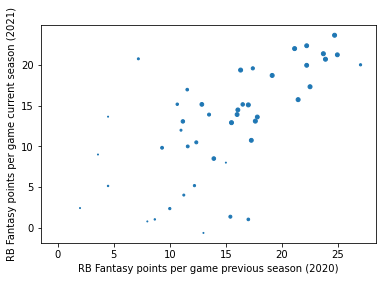

In [272]:
plt.scatter(ff_qb_pts['fp_per_gm20'], ff_qb_pts['fp_per_gm21'], s = ff_qb_pts['GS_20'])
# plt.legend(handles =ff_qb_pts['GS_20'] , loc=2) ## Need to figure out how to add a good legend in
plt.xlabel('RB Fantasy points per game previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

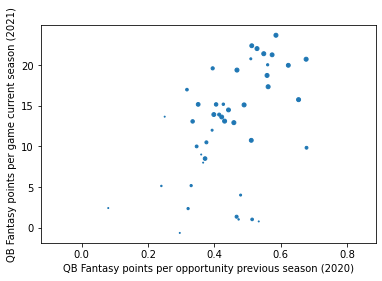

In [273]:
plt.scatter(ff_qb_pts['fp_per_opp20'], ff_qb_pts['fp_per_gm21'], s= ff_qb_pts['GS_20'])
plt.xlabel('QB Fantasy points per opportunity previous season (2020)')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points in previous season (2020)')

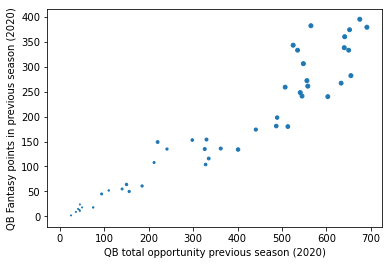

In [274]:
plt.scatter(ff_qb_pts['ttl_opp20'], ff_qb_pts['FantasyPoints_20'], ff_qb_pts['GS_20'])
plt.xlabel('QB total opportunity previous season (2020)')
plt.ylabel('QB Fantasy points in previous season (2020)')

Text(0, 0.5, 'QB Fantasy points in previous season (2020)')

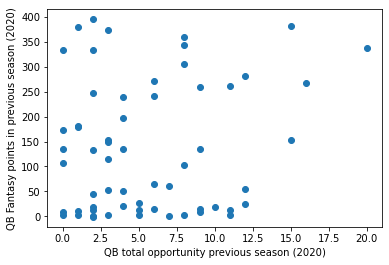

In [275]:
plt.scatter(ff_qb_pts['years_exp_20'], ff_qb_pts['FantasyPoints_20'] )
plt.xlabel('QB total opportunity previous season (2020)')
plt.ylabel('QB Fantasy points in previous season (2020)')

<AxesSubplot:>

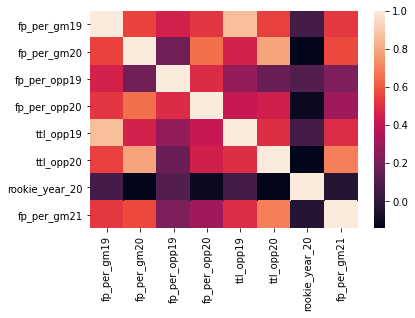

In [276]:
sns.heatmap(ff_qb_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20',
                       'rookie_year_20',
                       'fp_per_gm21']].corr())

### RB

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

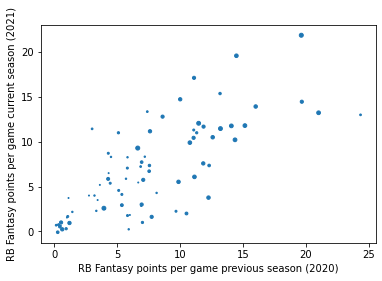

In [277]:
plt.scatter(ff_rb_pts['fp_per_gm20'], ff_rb_pts['fp_per_gm21'], s = ff_rb_pts['GS_20'])
# plt.legend(ff_rb_pts['GS_20']) ## Need to figure out how to add a good legend in
plt.xlabel('RB Fantasy points per game previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

The players with possibly most value are the ones lower on the x axis, but higher on y axis

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

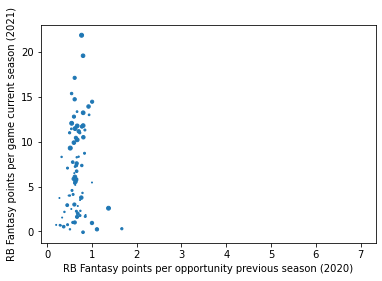

In [278]:
plt.scatter(ff_rb_pts['fp_per_opp20'], ff_rb_pts['fp_per_gm21'], ff_rb_pts['GS_20'])
plt.xlabel('RB Fantasy points per opportunity previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

There appear to be some outliers in fantasy points per opportunity

Text(0, 0.5, 'RB Fantasy points in previous season (2020)')

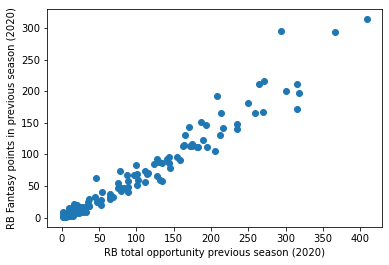

In [279]:
plt.scatter(ff_rb_pts['ttl_opp20'], ff_rb_pts['FantasyPoints_20'])
plt.xlabel('RB total opportunity previous season (2020)')
plt.ylabel('RB Fantasy points in previous season (2020)')

Text(0, 0.5, 'RB Fantasy points in season(2020)')

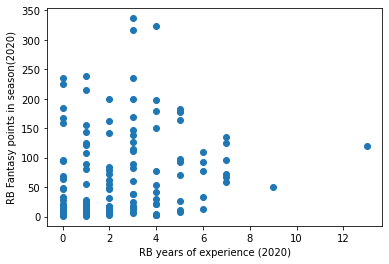

In [280]:
plt.scatter(ff_rb_pts['years_exp_20'], ff_rb_pts['FantasyPoints_20hppr'] )
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Standard Fantasy points in season(2020)')

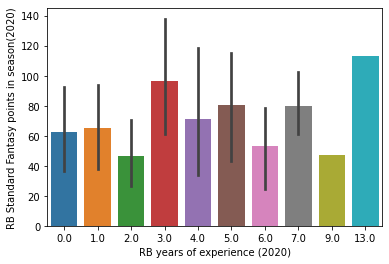

In [281]:
sns.barplot(ff_rb_pts['years_exp_20'], ff_rb_pts['FantasyPoints_20'] )
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB Standard Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Half-ppr Fantasy points in season(2020)')

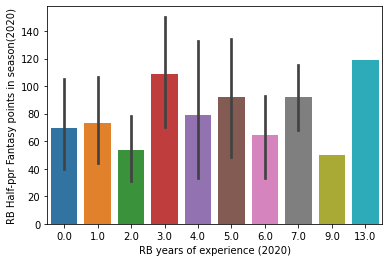

In [282]:
sns.barplot(ff_rb_pts['years_exp_20'], ff_rb_pts['FantasyPoints_20hppr'] )
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB Half-ppr Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Fantasy points per game in season(2020)')

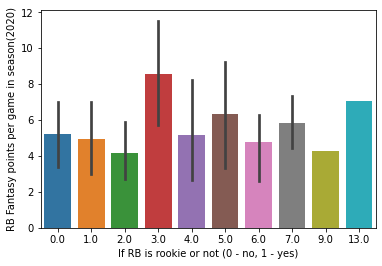

In [283]:
sns.barplot(ff_rb_pts['years_exp_20'], ff_rb_pts['fp_per_gm20'] )
plt.xlabel('If RB is rookie or not (0 - no, 1 - yes)')
plt.ylabel('RB Fantasy points per game in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Fantasy points per game in season(2020)')

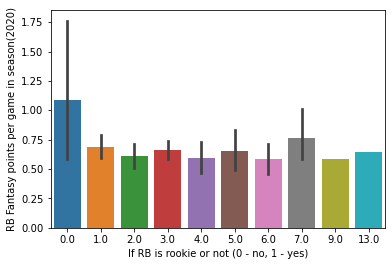

In [307]:
sns.barplot(ff_rb_pts['years_exp_20'], ff_rb_pts['fp_per_opp20'] )
plt.xlabel('If RB is rookie or not (0 - no, 1 - yes)')
plt.ylabel('RB Fantasy points per game in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Fantasy points per game in season(2020)')

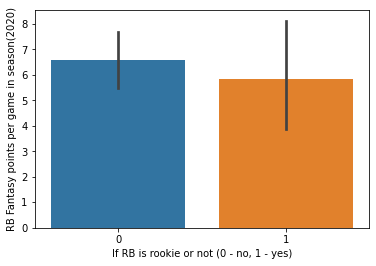

In [284]:
sns.barplot(ff_rb_pts['rookie20'], ff_rb_pts['fp_per_gm20hppr'] )
plt.xlabel('If RB is rookie or not (0 - no, 1 - yes)')
plt.ylabel('RB Fantasy points per game in season(2020)')

<AxesSubplot:>

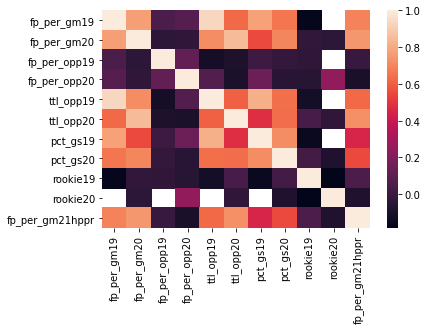

In [285]:
sns.heatmap(ff_rb_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 
                       'pct_gs19', 'pct_gs20', 'rookie19',
                       'rookie20',
                       'fp_per_gm21hppr']].corr())

### WR

Text(0, 0.5, 'WR Fantasy points per game current season (2021)')

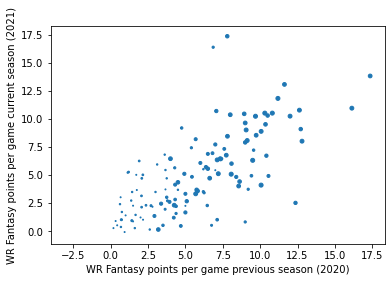

In [286]:
plt.scatter(ff_wr_pts['fp_per_gm20'], ff_wr_pts['fp_per_gm21'], s = ff_wr_pts['GS_20'])
plt.xlabel('WR Fantasy points per game previous season (2020)')
plt.ylabel('WR Fantasy points per game current season (2021)')

Text(0, 0.5, 'WR Fantasy points per game current season (2021)')

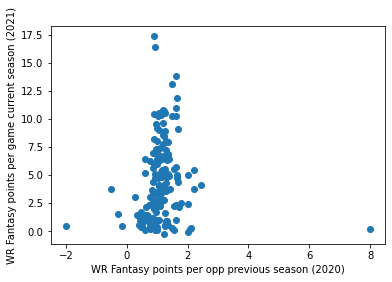

In [287]:
plt.scatter(ff_wr_pts['fp_per_opp20'], ff_wr_pts['fp_per_gm21'])
plt.xlabel('WR Fantasy points per opp previous season (2020)')
plt.ylabel('WR Fantasy points per game current season (2021)')

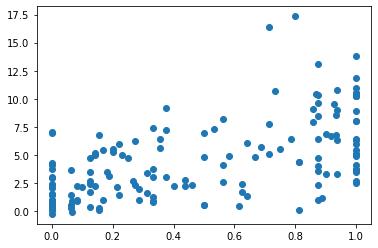

In [288]:
plt.scatter(ff_wr_pts['pct_gs20'], ff_wr_pts['fp_per_gm21'])

Text(0, 0.5, 'WR Fantasy points in previous season (2020)')

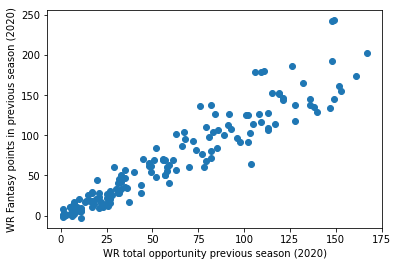

In [289]:
plt.scatter(ff_wr_pts['ttl_opp20'], ff_wr_pts['FantasyPoints_20'])
plt.xlabel('WR total opportunity previous season (2020)')
plt.ylabel('WR Fantasy points in previous season (2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points in season(2019)')

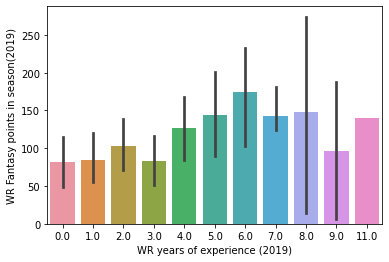

In [290]:
sns.barplot(ff_wr_pts['years_exp_19'], ff_wr_pts['FantasyPoints_19'])
plt.xlabel('WR years of experience (2019)')
plt.ylabel('WR Fantasy points in season(2019)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points in season(2020)')

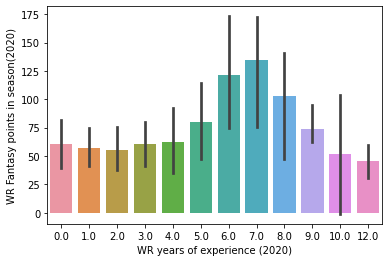

In [291]:
sns.barplot(ff_wr_pts['years_exp_20'], ff_wr_pts['FantasyPoints_20'] )
plt.xlabel('WR years of experience (2020)')
plt.ylabel('WR Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points per game in season(2020)')

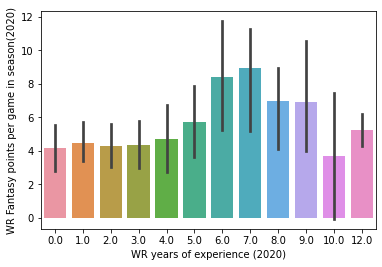

In [292]:
sns.barplot(ff_wr_pts['years_exp_20'], ff_wr_pts['fp_per_gm20'] )
plt.xlabel('WR years of experience (2020)')
plt.ylabel('WR Fantasy points per game in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points in season(2020)')

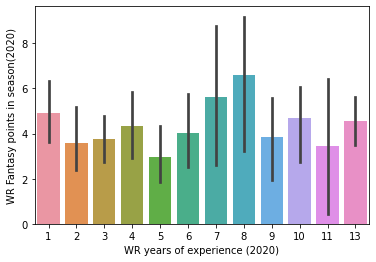

In [293]:
sns.barplot(ff_wr_pts['years_exp_21'], ff_wr_pts['fp_per_gm21'] )
plt.xlabel('WR years of experience (2020)')
plt.ylabel('WR Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points per game in season(2020)')

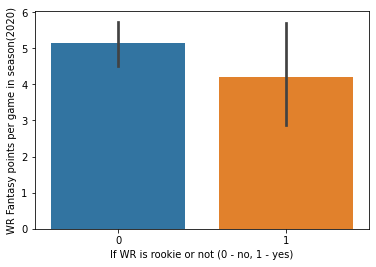

In [294]:
sns.barplot(ff_wr_pts['rookie20'], ff_wr_pts['fp_per_gm20'] )
plt.xlabel('If WR is rookie or not (0 - no, 1 - yes)')
plt.ylabel('WR Fantasy points per game in season(2020)')

<AxesSubplot:>

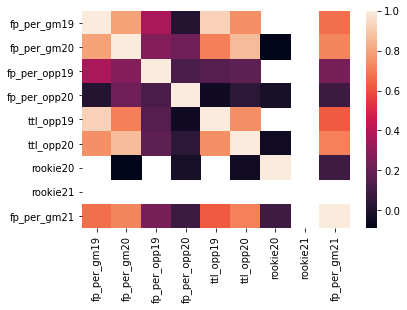

In [295]:
sns.heatmap(ff_wr_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 'rookie20',
                       'rookie21',
                       'fp_per_gm21']].corr())

### TE

Text(0, 0.5, 'TE Fantasy points per game current season (2021)')

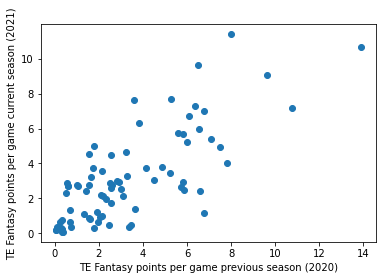

In [296]:
plt.scatter(ff_te_pts['fp_per_gm20'], ff_te_pts['fp_per_gm21'])
plt.xlabel('TE Fantasy points per game previous season (2020)')
plt.ylabel('TE Fantasy points per game current season (2021)')

Text(0, 0.5, 'TE Fantasy points per game current season (2021)')

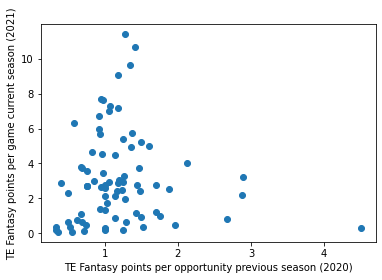

In [297]:
plt.scatter(ff_te_pts['fp_per_opp20'], ff_te_pts['fp_per_gm21'])
plt.xlabel('TE Fantasy points per opportunity previous season (2020)')
plt.ylabel('TE Fantasy points per game current season (2021)')

Text(0, 0.5, 'TE Fantasy points previous season (2020)')

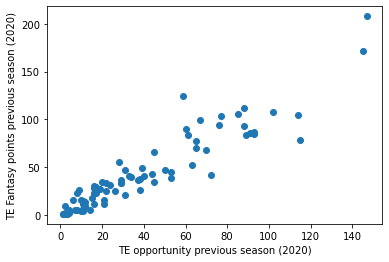

In [298]:
plt.scatter(ff_te_pts['ttl_opp20'], ff_te_pts['FantasyPoints_20'])
plt.xlabel('TE opportunity previous season (2020)')
plt.ylabel('TE Fantasy points previous season (2020)')

Text(0, 0.5, 'TE Fantasy points previous season (2020)')

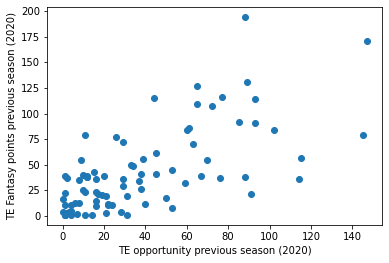

In [299]:
plt.scatter(ff_te_pts['ttl_opp20'], ff_te_pts['FantasyPoints_21'])
plt.xlabel('TE opportunity previous season (2020)')
plt.ylabel('TE Fantasy points previous season (2020)')

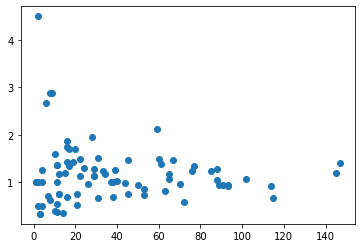

In [305]:
plt.scatter(ff_te_pts['ttl_opp20'], ff_te_pts['fp_per_opp20'])

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'TE Fantasy points in season(2020)')

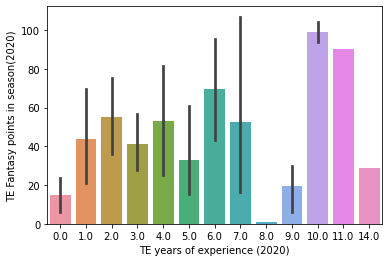

In [300]:
sns.barplot(ff_te_pts['years_exp_20'], ff_te_pts['FantasyPoints_20'] )
plt.xlabel('TE years of experience (2020)')
plt.ylabel('TE Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'TE Fantasy points in season(2020)')

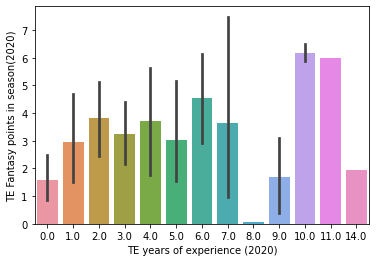

In [301]:
sns.barplot(ff_te_pts['years_exp_20'], ff_te_pts['fp_per_gm20'] )
plt.xlabel('TE years of experience (2020)')
plt.ylabel('TE Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'TE Fantasy points in season(2020)')

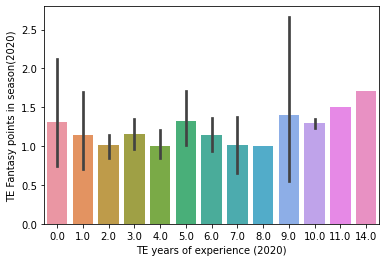

In [306]:
sns.barplot(ff_te_pts['years_exp_20'], ff_te_pts['fp_per_opp20'] )
plt.xlabel('TE years of experience (2020)')
plt.ylabel('TE Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'TE Fantasy points per game in season(2020)')

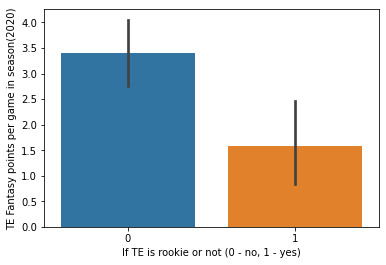

In [302]:
sns.barplot(ff_te_pts['rookie20'], ff_te_pts['fp_per_gm20'] )
plt.xlabel('If TE is rookie or not (0 - no, 1 - yes)')
plt.ylabel('TE Fantasy points per game in season(2020)')

<AxesSubplot:>

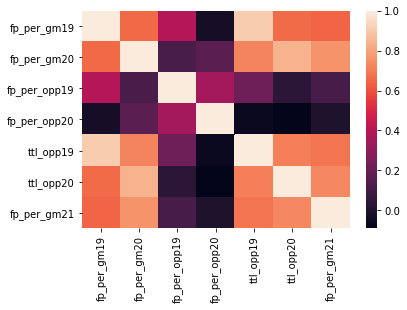

In [303]:
sns.heatmap(ff_te_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 
                       'fp_per_gm21']].corr())

### Cutoffs? Cleaning outliers? Distributions?



Cutoffs for total opportunities in previous season?

In [314]:
ff_rb_pts[['ttl_opp19','ttl_opp20']].describe()

,ttl_opp19,ttl_opp20
count,102.000000,124.000000
mean,117.588235,99.500000
std,113.802796,94.957372
min,0.000000,0.000000
25%,19.500000,17.750000
50%,81.500000,76.500000
75%,191.250000,162.500000
max,431.000000,409.000000


Opportunities

<AxesSubplot:xlabel='ttl_opp19', ylabel='Count'>

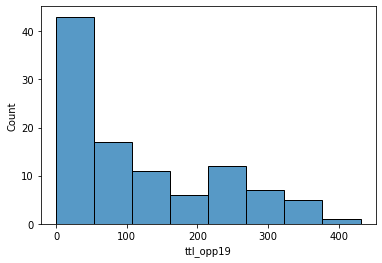

In [317]:
sns.histplot(data = ff_rb_pts, x = 'ttl_opp19')

<AxesSubplot:xlabel='ttl_opp20', ylabel='Count'>

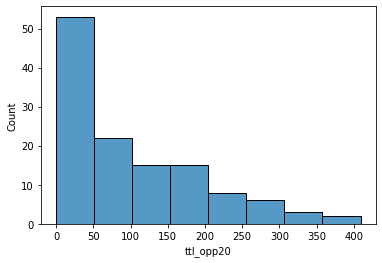

In [318]:
sns.histplot(data = ff_rb_pts, x = 'ttl_opp20')

Fantasy Points

<AxesSubplot:xlabel='FantasyPoints_19hppr', ylabel='Count'>

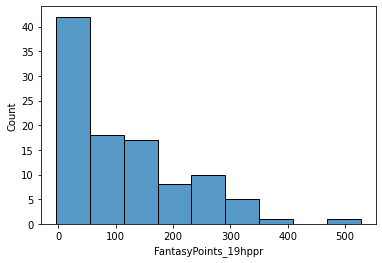

In [319]:
sns.histplot(data = ff_rb_pts, x = 'FantasyPoints_19hppr')

<AxesSubplot:xlabel='FantasyPoints_20hppr', ylabel='Count'>

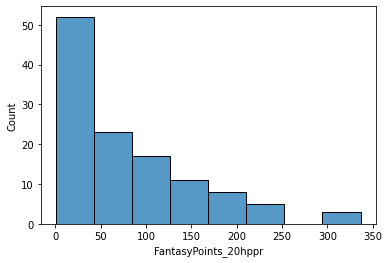

In [320]:
sns.histplot(data = ff_rb_pts, x = 'FantasyPoints_20hppr')

<AxesSubplot:xlabel='fp_per_gm20hppr', ylabel='Count'>

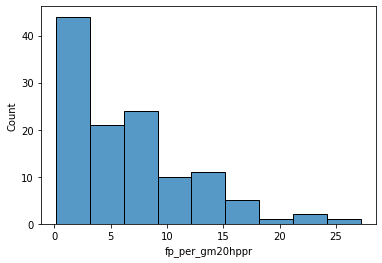

In [321]:
sns.histplot(data = ff_rb_pts, x = 'fp_per_gm20hppr')

<AxesSubplot:xlabel='GS_20', ylabel='Count'>

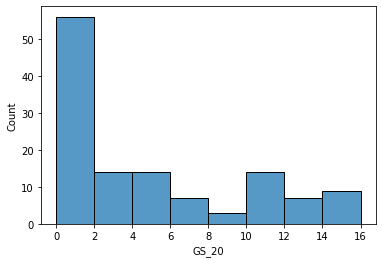

In [344]:
sns.histplot(data = ff_rb_pts, x = 'GS_20')

<AxesSubplot:xlabel='years_exp_21', ylabel='Count'>

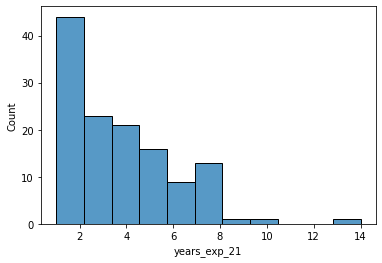

In [322]:
sns.histplot(data = ff_rb_pts, x = 'years_exp_21')

Overall, mostly an exponential distribution for all of these variables. Before considering outliers, let alone modeling, we'll need to transform each.

QBs

<AxesSubplot:xlabel='ttl_opp20', ylabel='Count'>

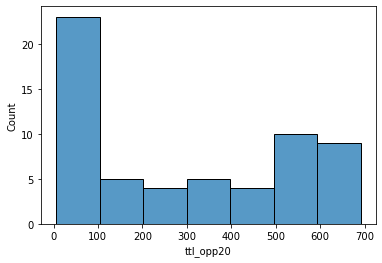

In [323]:
sns.histplot(data = ff_qb_pts, x = 'ttl_opp20')

<AxesSubplot:xlabel='FantasyPoints_20hppr', ylabel='Count'>

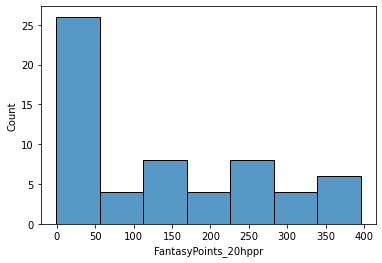

In [324]:
sns.histplot(data = ff_qb_pts, x = 'FantasyPoints_20hppr')

<AxesSubplot:xlabel='FantasyPoints_19hppr', ylabel='Count'>

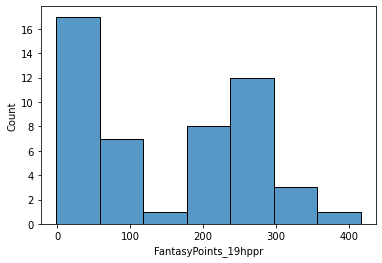

In [327]:
sns.histplot(data = ff_qb_pts, x = 'FantasyPoints_19hppr')

<AxesSubplot:xlabel='GS_20', ylabel='Count'>

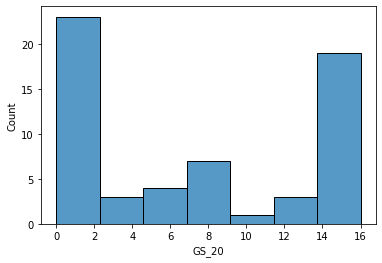

In [343]:
sns.histplot(data = ff_qb_pts, x = 'GS_20')

<AxesSubplot:xlabel='years_exp_21', ylabel='Count'>

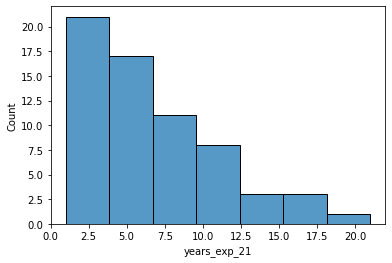

In [326]:
sns.histplot(data = ff_qb_pts, x = 'years_exp_21')

Similar exponential distribution for years experience of qbs, but fantasy pts and opportunities are slightly different; seem to go down and then up again

#### WRs

<AxesSubplot:xlabel='ttl_opp20', ylabel='Count'>

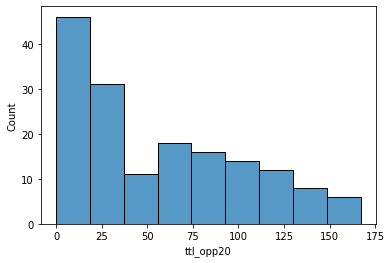

In [328]:
sns.histplot(data = ff_wr_pts, x = 'ttl_opp20')

<AxesSubplot:xlabel='fp_per_opp20', ylabel='Count'>

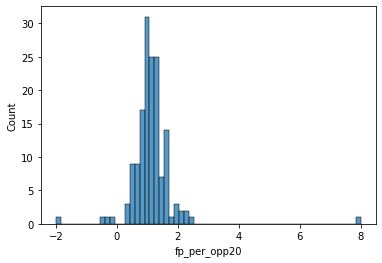

In [345]:
sns.histplot(data = ff_wr_pts, x = 'fp_per_opp20')

<AxesSubplot:xlabel='FantasyPoints_19hppr', ylabel='Count'>

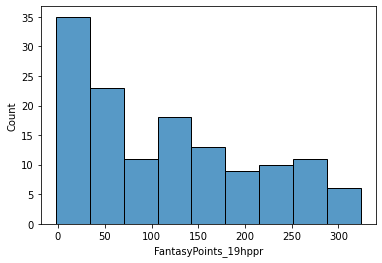

In [329]:
sns.histplot(data = ff_wr_pts, x = 'FantasyPoints_19hppr')

<AxesSubplot:xlabel='FantasyPoints_20hppr', ylabel='Count'>

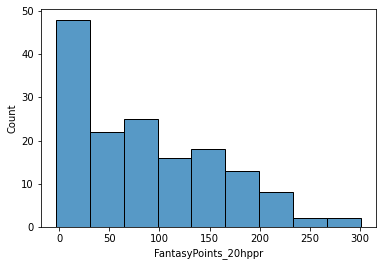

In [330]:
sns.histplot(data = ff_wr_pts, x = 'FantasyPoints_20hppr')

<AxesSubplot:xlabel='fp_per_gm20hppr', ylabel='Count'>

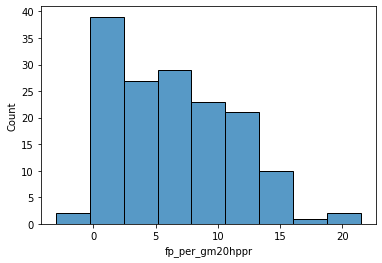

In [355]:
sns.histplot(data = ff_wr_pts, x = 'fp_per_gm20hppr')

<AxesSubplot:xlabel='GS_20', ylabel='Count'>

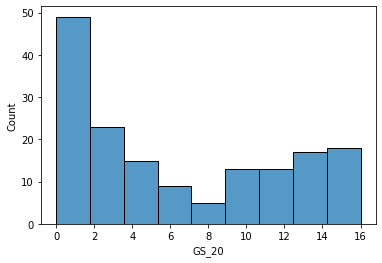

In [342]:
sns.histplot(data = ff_wr_pts, x = 'GS_20')

<AxesSubplot:xlabel='years_exp_21', ylabel='Count'>

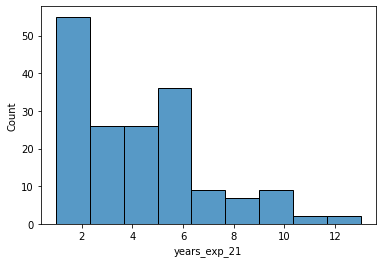

In [331]:
sns.histplot(data = ff_wr_pts, x = 'years_exp_21')

Similar pattern for WRs and rbs.

#### TEs

<AxesSubplot:xlabel='ttl_opp20', ylabel='Count'>

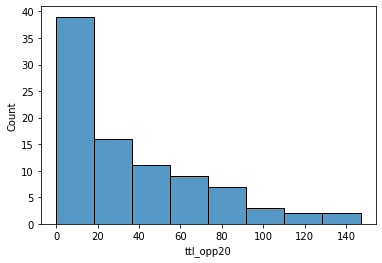

In [332]:
sns.histplot(data = ff_te_pts, x = 'ttl_opp20')

<AxesSubplot:xlabel='FantasyPoints_19hppr', ylabel='Count'>

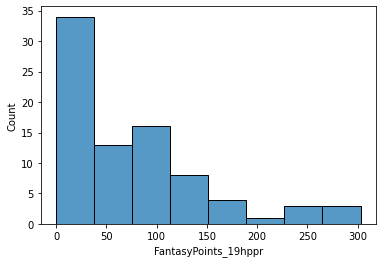

In [335]:
sns.histplot(data = ff_te_pts, x = 'FantasyPoints_19hppr')

<AxesSubplot:xlabel='FantasyPoints_20hppr', ylabel='Count'>

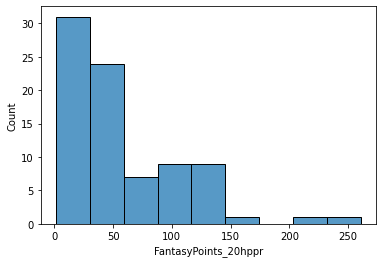

In [336]:
sns.histplot(data = ff_te_pts, x = 'FantasyPoints_20hppr')

BIG change in TE point scored distribution. only 3 with ~>150. 

<AxesSubplot:xlabel='years_exp_21', ylabel='Count'>

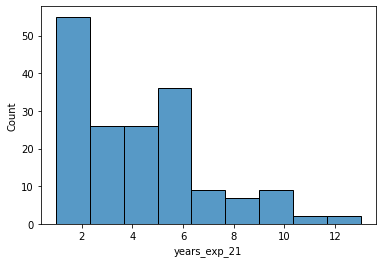

In [338]:
sns.histplot(data = ff_wr_pts, x = 'years_exp_21')

<AxesSubplot:xlabel='FantasyPoints_20hppr', ylabel='Count'>

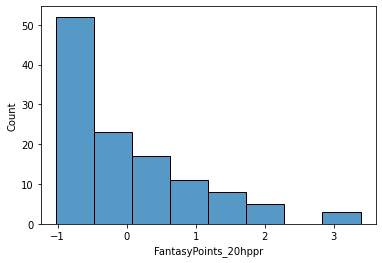

In [353]:
sns.histplot(data = rb_trans, x = 'FantasyPoints_20hppr')

## Saving Current DFs to my CPU

In [304]:
ff_qb_pts.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/qb_19_21_fantasy.csv")
ff_rb_pts.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/rb_19_21_fantasy.csv")
ff_wr_pts.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/wr_19_21_fantasy.csv")
ff_te_pts.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/te_19_21_fantasy.csv")

### Idea for next notebook/dataframe to combine with this
Can we add more to these data frames, in terms of -- year in the league in '21, rookie contract or not, previous year team passing ranks, rushing ranks, qb play, OL play, etc?


### Modeling:

New notebook for that using above dataframes; may combine DFs within this notebook or new notebook

## Pre-Processing before modeling

## Initial Modeling

# need a dataset of predictor variables for final 

from bs4 import BeautifulSoup
from urllib import request


# 2022 data or testing data

r = request.get("https://www.pro-football-reference.com/years/2022/fantasy.htm").read()
soup = BeautifulSoup(website, 'lxml')

table = soup.find('table', attrs={'id': 'fantasy','class': 'per_match_toggle'})

table_headers = [header.text for header in table.find('thead').find_all('th')]
table_rows = table.find_all('tr')

player_data = [[td.getText() for tr in table_rows[i].findAll(['td','th'])] for i in table_rows]

print(table_headers)
df = pd.DataFrame(player_data,table_headers)

df.head()